In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from torch import nn
import numpy as np


from unityagents import UnityEnvironment
from model.ppo import PPOAgent, PPOTrainer
# from agent import PPOAgent
# from trainer import PPOTrainer


In [2]:
# env = UnityEnvironment(file_name='/Users/claudcop/code/deep-rl/DeepRL_Continuous_Control/unity/Reacher.app', no_graphics=True)
env = UnityEnvironment(file_name='/Users/claudcop/code/deep-rl/DeepRL_Continuous_Control/unity/Reacher20.app', no_graphics=False)


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
agent = PPOAgent(env, 
                 network_config={
                     'actor_hidden_sizes': [256, 128],
                     'critic_hidden_sizes': [256, 128],
                     'hidden_activation': nn.ReLU,
                     'output_activation': nn.Tanh}, seed=4)
# agent = PPOAgent(env, network_config={'hidden_sizes':[256, 128], 'hidden_activation': nn.Tanh, 'action_std': 1., 'single_network': False})
agent.policy.pi, agent.policy.V

(Actor(
   (layers): ModuleList(
     (0): Linear(in_features=33, out_features=256, bias=True)
     (1): ReLU()
     (2): Linear(in_features=256, out_features=128, bias=True)
     (3): ReLU()
     (4): Linear(in_features=128, out_features=4, bias=True)
     (5): Tanh()
   )
 ),
 Critic(
   (layers): ModuleList(
     (0): Linear(in_features=33, out_features=256, bias=True)
     (1): ReLU()
     (2): Linear(in_features=256, out_features=128, bias=True)
     (3): ReLU()
     (4): Linear(in_features=128, out_features=1, bias=True)
   )
 ))

In [4]:
# [layer for layer in agent.policy.pi.modules()]
# import torch.nn as nn
# [layer for layer in single_net_agent.policy.pi if isinstance(layer, nn.Linear)]
# len(single_net_agent.policy.pi[:])

Episode 0: Exploration std mean: 0.00, Score: 0.00, 100 episode Mean Score: 0.00:   0%|          | 0/300 [00:00<?, ?episodes/s]

Episode 218: Exploration std mean: 0.14, Score: 39.47, 100 episode Mean Score: 39.37:  73%|███████▎  | 218/300 [24:04<09:03,  6.63s/episodes]
INFO:model.ppo.trainer:	Training Interrupted at episode 218


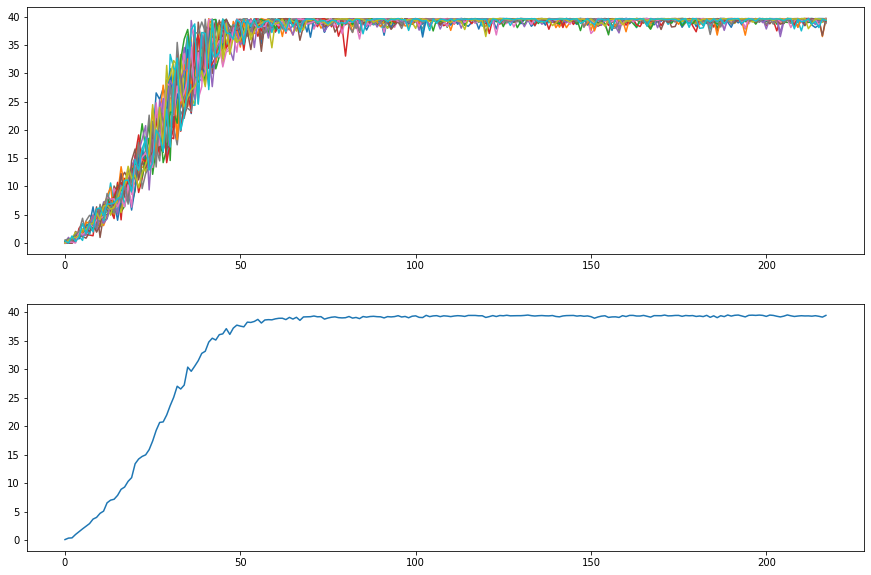

In [5]:
trainer = PPOTrainer(agent, 
                     batch_size=512, 
                     learning_rate_actor=1e-4, learning_rate_critic=1e-4,
                     gamma=0.99, epsilon_clip=0.2, 
                     training_epochs=10, gae_lambda=.9, beta=1e-3)
# trainer.toggle_debug()
new_agent = trainer.train(n_episodes=300, max_steps_per_episode=1000, target=30.)

fig, ax = plt.subplots(figsize=(15, 5 * (1 + int(agent.n_threads > 1))), nrows=1 + int(agent.n_threads > 1))
if agent.n_threads > 1:
    ax[0].plot(trainer.scores)
    ax[1].plot(np.asarray(trainer.scores).mean(axis=1))
else:
    ax.plot(trainer.scores)

plt.show()

In [8]:
trainer.run_training_episode(1000)

array([39.61999911, 39.56999912, 39.19999912, 39.62999911, 39.60999911,
       39.60999911, 39.62999911, 39.51999912, 38.35999914, 39.62999911,
       39.61999911, 39.63999911, 39.61999911, 39.55999912, 39.52999912,
       39.57999912, 39.45999912, 39.57999912, 39.39999912, 39.61999911])

In [9]:
new_agent.run_test_episode(track_progress=True, noisy=False)

  0%|          | 0/1000 [00:00<?, ?it/s]


TypeError: unsupported format string passed to numpy.ndarray.__format__

In [22]:
agent_pi = PPOAgent(env, 
                 network_config={
                     'actor_hidden_sizes': [256, 128],
                     'critic_hidden_sizes': [256, 128],
                     'hidden_activation': nn.Tanh,
                     'output_activation': nn.Tanh}, seed=4)
agent_pi.policy = agent.policy
score = agent_pi.run_test_episode()
score


Mean Cumulative Reward: 0.16:  68%|██████▊   | 683/1000 [00:53<00:25, 12.44it/s]

In [17]:
score

array([0.  , 0.  , 0.  , ..., 0.04, 0.04, 0.04])

In [ ]:
agent.policy.std

AttributeError: 'PPOPolicy' object has no attribute 'std'

In [ ]:
agent.policy.V[0].weight.data

In [ ]:
import numpy as np
# plt.plot(np.asarray(trainer.scores))
trainer.scores[17:]

In [ ]:
# np.asarray(trainer.scores).max(axis=1)
# agent.policy.action_std = agent.policy.action_std * .9 
# agent.policy.action_std